In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("Train.csv") 
df_test = pd.read_csv("Test.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_train.shape

(8523, 12)

In [4]:
df_test.shape

(5681, 11)

In [5]:
# getting information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# statistical info
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Preprocessing the data 

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace = True)
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace = True)

In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Outletsize is categorical column so will so we fill it with Mode imputation

In [11]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace = True)
df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace = True)

In [12]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis = 1, inplace = True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis = 1, inplace = True)

In [15]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


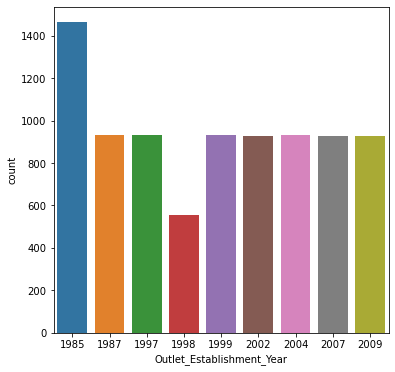

In [16]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

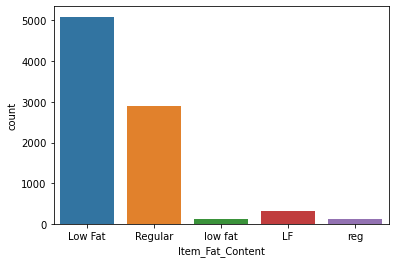

In [17]:
sns.countplot(df_train.Item_Fat_Content)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

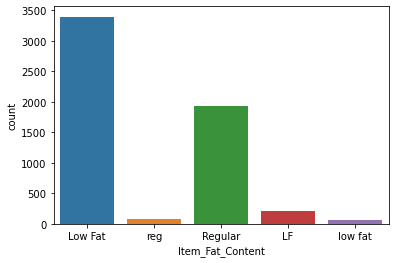

In [18]:
sns.countplot(df_test.Item_Fat_Content)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

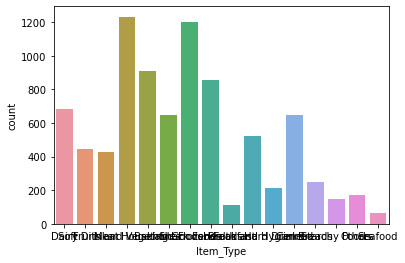

In [19]:
sns.countplot(df_train.Item_Type)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

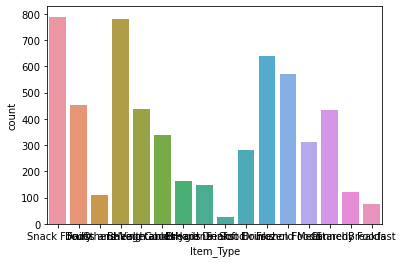

In [20]:
sns.countplot(df_test.Item_Type)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

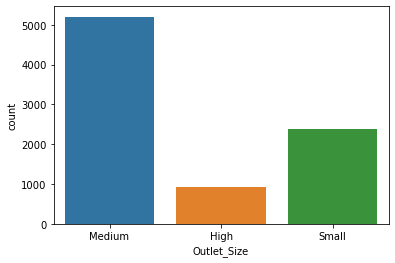

In [21]:
sns.countplot(df_train.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

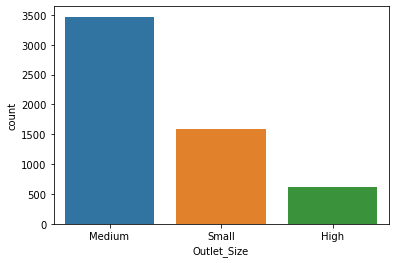

In [22]:
sns.countplot(df_test.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

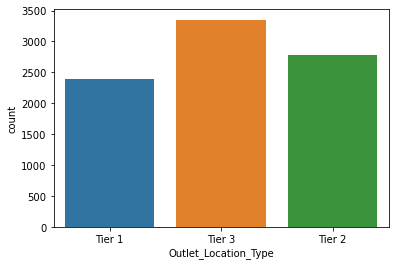

In [23]:
sns.countplot(df_train.Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

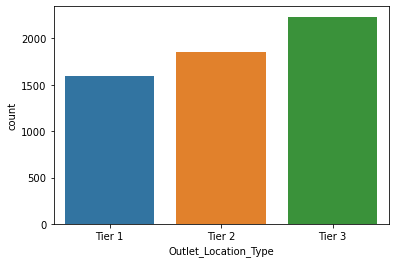

In [24]:
sns.countplot(df_test.Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

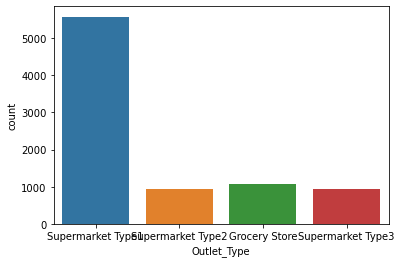

In [25]:
sns.countplot(df_train.Outlet_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

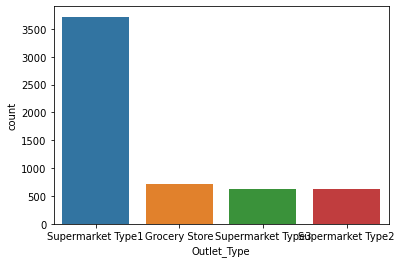

In [26]:
sns.countplot(df_test.Outlet_Type)

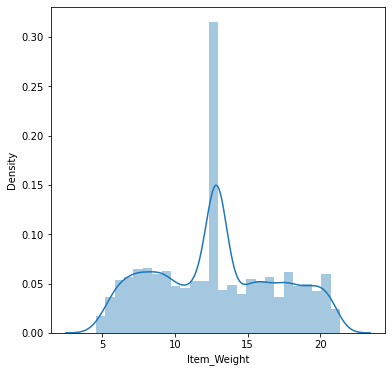

In [27]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Weight'])
plt.show()

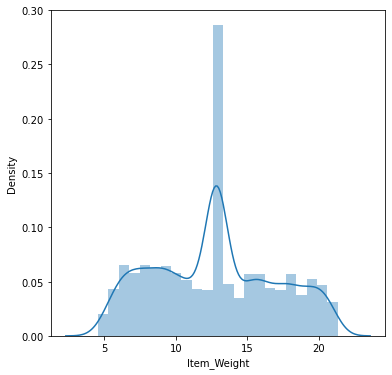

In [28]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df_test['Item_Weight'])
plt.show()

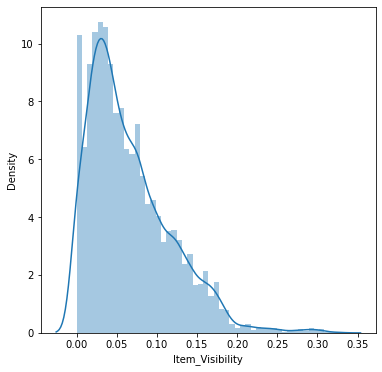

In [29]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

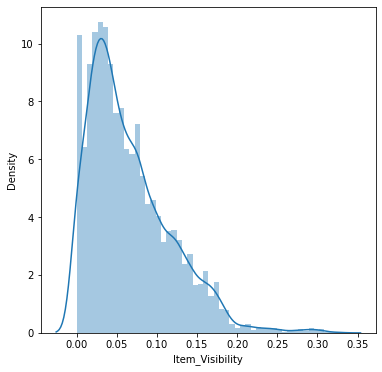

In [30]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

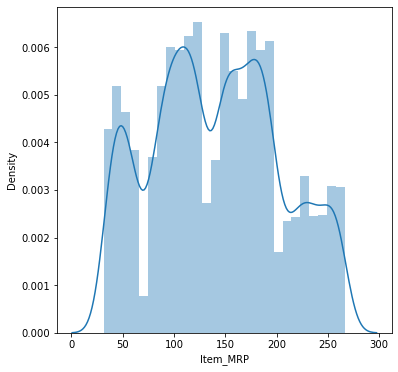

In [31]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_MRP'])
plt.show()

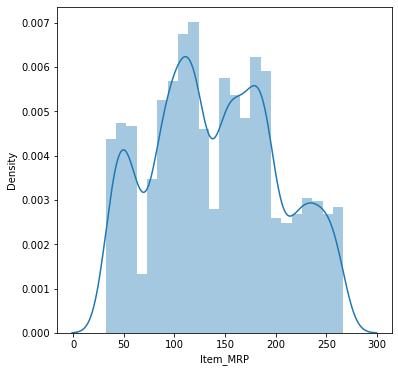

In [32]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df_test['Item_MRP'])
plt.show()

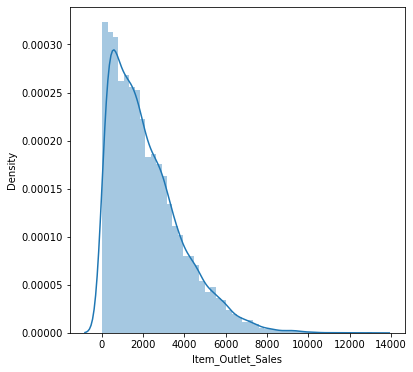

In [33]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

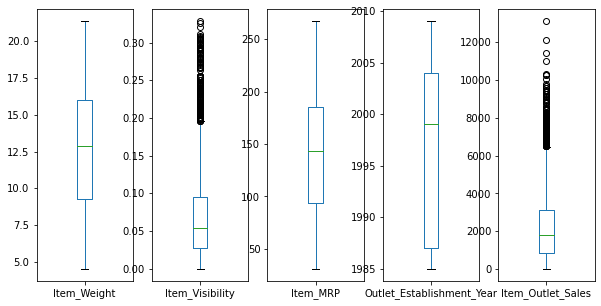

In [34]:
df_train.plot(kind = 'box',subplots = True,figsize =(10,5))

<AxesSubplot:xlabel='Item_Weight'>

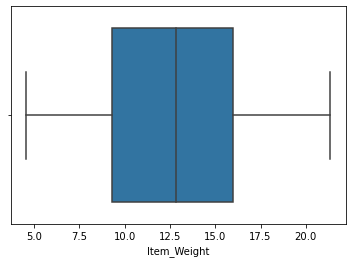

In [35]:
sns.boxplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

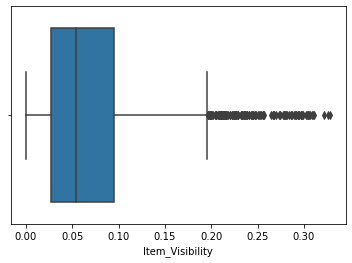

In [36]:
sns.boxplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

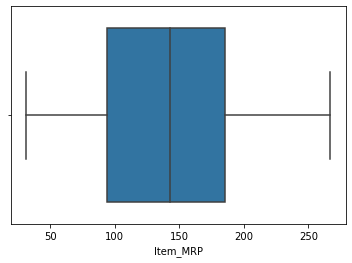

In [37]:
sns.boxplot(df_train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

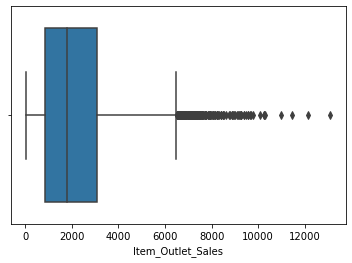

In [38]:
sns.boxplot(df_train['Item_Outlet_Sales'])

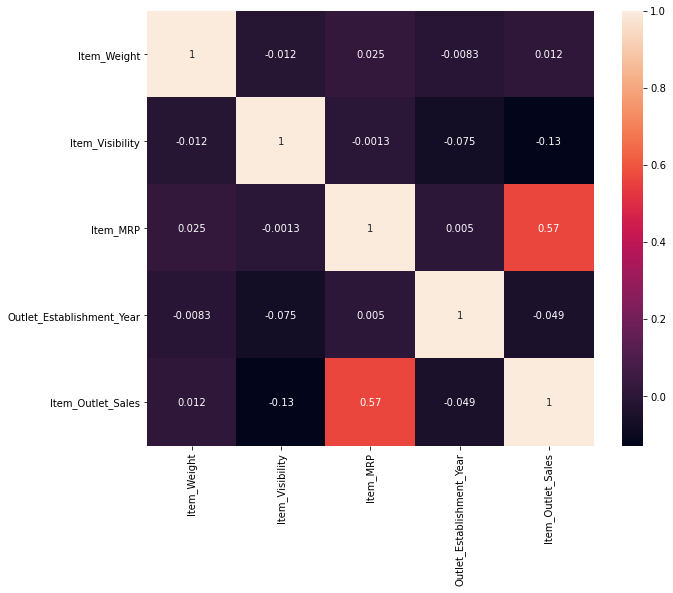

In [39]:
plt.figure(figsize= (10,8))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

### Percentage of data loss

# Preprocessing Task before model building

### 1) Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [41]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])


In [42]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


### Removing Outliers

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df_train))
z

array([[0.84187169, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.64170589, 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.09855449, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.53424315, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.33644372, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.45963367, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [44]:
thersold = 3
print(np.where (z>3))


(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [45]:
df_train_new = df_train[(z<3).all(axis = 1)]
print(df_train.shape)
print(df_train_new.shape)

(8523, 10)
(8222, 10)


#### Percentage of loss 

In [46]:
loss_percent =(8523-8222)/8523*100
print(loss_percent)

3.5316203214830457


### splitting our data into train and test

In [47]:
x = df_train_new.drop('Item_Outlet_Sales',axis = 1)

In [48]:
y = df_train_new['Item_Outlet_Sales']

In [49]:
from sklearn.model_selection  import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 101,test_size = 0.2)

In [50]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6529,7.02,1,0.049865,4,82.9250,1997,2,0,1
4373,15.20,1,0.020280,8,49.1034,1998,1,2,0
1901,11.30,2,0.067107,5,258.1962,2007,1,1,1
923,11.50,1,0.173516,6,128.1652,1997,2,0,1
951,19.35,1,0.016598,5,121.5098,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
3705,6.69,2,0.036903,10,175.1370,2004,2,1,1
1446,7.63,1,0.061313,14,93.3436,2009,1,2,2
7000,14.60,2,0.043134,6,109.7254,2009,1,2,2
1430,16.70,2,0.054938,15,64.2168,2007,1,1,1


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
x_train_std = sc.fit_transform(x_train)

In [53]:
x_test_std = sc.transform(x_test)

In [54]:
x_train_std

array([[-1.62443562,  1.17525642, -0.9456055 , ..., -1.95831197,
         1.10620933, -0.25701467],
       [ 0.52943992, -0.58910365,  0.65254617, ...,  1.37238827,
        -1.36972695, -0.25701467],
       [-1.01909805, -0.58910365,  0.71310361, ..., -0.29296185,
        -1.36972695, -0.25701467],
       ...,
       [-0.08059019,  1.17525642,  0.38028602, ..., -0.29296185,
        -0.13175881, -0.25701467],
       [ 1.64391801,  1.17525642, -0.91037624, ..., -1.95831197,
         1.10620933, -0.25701467],
       [-1.65728339, -0.58910365,  0.67838083, ...,  1.37238827,
        -1.36972695, -0.25701467]])

In [55]:
x_test_std

array([[-1.36634596, -0.58910365, -0.3002077 , ...,  1.37238827,
        -1.36972695, -0.25701467],
       [ 0.55290262, -0.58910365, -0.92254113, ..., -0.29296185,
         1.10620933, -1.53858063],
       [-0.36214254,  1.17525642,  0.06248729, ..., -0.29296185,
        -0.13175881, -0.25701467],
       ...,
       [ 0.41212644,  1.17525642, -0.44180987, ..., -0.29296185,
         1.10620933,  1.02455129],
       [ 0.90484307,  1.17525642, -0.193505  , ..., -0.29296185,
        -0.13175881, -0.25701467],
       [ 0.6702161 , -0.58910365,  0.24243619, ..., -0.29296185,
         1.10620933, -1.53858063]])

## Model Building

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = LinearRegression()

In [57]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [58]:
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6529,7.02,1,0.049865,4,82.9250,1997,2,0,1
4373,15.20,1,0.020280,8,49.1034,1998,1,2,0
1901,11.30,2,0.067107,5,258.1962,2007,1,1,1
923,11.50,1,0.173516,6,128.1652,1997,2,0,1
951,19.35,1,0.016598,5,121.5098,1987,0,2,1


In [59]:
predlr = lr.predict(x_test_std)
predlr

array([1313.59852431, -639.26461367, 3918.71337462, ..., 2227.71470211,
        992.06420811, 1283.18938746])

In [60]:
print("Mean absolute error:", mean_absolute_error(y_test,predlr))
print("Mean squared error :",mean_squared_error(y_test,predlr))
print("Root mean sqaure:",np.sqrt(mean_squared_error(y_test,predlr)))

Mean absolute error: 842.4010223613599
Mean squared error : 1217059.6373048048
Root mean sqaure: 1103.2042591038182


In [61]:
print("r2 score:",r2_score(y_test,predlr))

r2 score: 0.48507946941704927


### Apporaching more regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [63]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_std,y_train)
print("DTC Score:",dtr.score(x_train_std,y_train))

dtr_pred = dtr.predict(x_test_std)
print("r2_score:",r2_score(y_test,dtr_pred))
print("Mean Squared error:",mean_squared_error(y_test,dtr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DTC Score: 1.0
r2_score: 0.12204634243753543
Mean Squared error: 2075120.1332634906
Root Mean Squared error: 1440.527727349769


In [64]:
print(dtr_pred)

[1414.825    97.2068 2330.9658 ... 1757.712  1086.5856  181.0976]


In [65]:
knr = KNeighborsRegressor()
knr.fit(x_train_std,y_train)
print("KNR Score:",knr.score(x_train_std,y_train))

knr_pred = knr.predict(x_test_std)
print("r2_score:",r2_score(y_test,knr_pred))
print("Mean Squared error:",mean_squared_error(y_test,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,knr_pred)))

KNR Score: 0.6742582078338063
r2_score: 0.4837382530635398
Mean Squared error: 1220229.719272408
Root Mean Squared error: 1104.6400858525858


In [66]:
print(knr_pred)

[1255.96512   83.8908  3106.88912 ... 1335.06216  917.73872  355.27088]


In [67]:
svr = SVR()
svr.fit(x_train_std,y_train)
print("SVR Score:",svr.score(x_train_std,y_train))

svr_pred = svr.predict(x_test_std)
print("r2_score:",r2_score(y_test,svr_pred))
print("Mean Squared error:",mean_squared_error(y_test,svr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,svr_pred)))

SVR Score: 0.06431660722738175
r2_score: 0.07806711669733912
Mean Squared error: 2179068.873601563
Root Mean Squared error: 1476.1669531599612


In [68]:
print(svr_pred)

[1649.69262291 1516.52911887 2063.88932074 ... 1767.09129587 1648.77986257
 1751.56242002]


In [69]:
from sklearn.model_selection import cross_val_score


score  = cross_val_score(lr,x,y,cv = 2)
print(score)
print(score.mean())
print(score.std())

[0.49636888 0.49348755]
0.49492821582832036
0.0014406636116379712


In [70]:
score = cross_val_score(knr,x,y,cv = 5)
print(score)
print(score.mean())
print(score.std())

[0.4241771  0.38019969 0.34339716 0.39119288 0.39741785]
0.3872769370519548
0.02628808624912641


In [71]:
score = cross_val_score(dtr,x,y,cv = 3)
print(score)
print(score.mean())
print(score.std())

[0.15954074 0.14798171 0.15002922]
0.15251722313699712
0.005036226080437418


In [72]:
score = cross_val_score(svr,x,y,cv = 9)
print(score)
print(score.mean())
print(score.std())

[-0.03224584 -0.06343579 -0.03101836 -0.04776784 -0.03527242 -0.05903022
 -0.03207845 -0.03407603 -0.03269296]
-0.040846434524531156
0.011924117320629578


### Apporaching Ensemble Method

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =1000,random_state = 42)
rf.fit(x_train_std,y_train)
predict = rf.predict(x_test_std)

print(predict)
print("RFScore:",rf.score(x_train_std,y_train))
print("r2_score:",r2_score(y_test,predict))

[1485.1860782  113.3384682 3927.3557916 ... 1545.5821278 1181.2763418
  415.5098008]
RFScore: 0.9393109254835904
r2_score: 0.5189632056060627


In [74]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50,random_state=42) #by default=100
ada.fit(x_train_std,y_train)
predict=ada.predict(x_test_std)

print(predict)
print("AdaBoostScore:",ada.score(x_train_std,y_train))
print("r2_score:",r2_score(y_test,predict))

[1471.5315235   215.93740336 4050.99584449 ... 1783.96366951 1068.40398941
  525.01412407]
AdaBoostScore: 0.5674390119711541
r2_score: 0.5358207548578673


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor() #by default=100
grad.fit(x_train_std,y_train)
predict=grad.predict(x_test_std)

print(predict)
print("Gradient Score:",grad.score(x_train_std,y_train))
print("r2_score:",r2_score(y_test,predict))

[1393.48383209  134.19445492 4015.38660954 ... 1500.33554393 1130.43300789
  422.66265228]
Gradient Score: 0.6245457997549639
r2_score: 0.5724768717509079


### Hyper Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1,1.0)
max_features = ["auto","sqrt","log2"]
min_samples_split = np.linspace(0.1,1.0,10)
grid = dict(n_estimators = n_estimators)

grid_search_forest = GridSearchCV(estimator = model,param_grid = grid,n_jobs = -1,scoring = 'r2',error_score = 0,verbose = 2,cv= 5)

grid_search_forest.fit(x_train_std,y_train)

print(f"Best:{grid_search_forest.best_score_:.3f} using{grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']


for mean,stdev,param in zip(means,stds,params):
    print(f"{mean:.3f}({stdev:.3f})with:{param}")



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best:0.548 using{'n_estimators': 1000}
0.513(0.027)with:{'n_estimators': 10}
0.543(0.026)with:{'n_estimators': 100}
0.548(0.024)with:{'n_estimators': 1000}


#### Saving the best model

In [82]:
import joblib 
joblib.dump(svr,'svrmodel.obj')
dtrloadmodel = joblib.load('svrmodel.obj')
dtrloadmodel.predict(x_test_std)

array([1649.69262291, 1516.52911887, 2063.88932074, ..., 1767.09129587,
       1648.77986257, 1751.56242002])

### Conclusion

In [83]:
a = np.array(y_test)
predicted = np.array(svr.predict(x_test_std))
df_mart = pd.DataFrame({"Original":a,"Predicted":predicted},index = range(len(a)))
df_mart

,Original,Predicted
0,1165.1500,1649.692623
1,194.4136,1516.529119
2,4402.9354,2063.889321
3,2454.1388,1701.145918
4,2892.2352,1784.052617
...,...,...
1640,1235.0590,1897.592936
1641,1323.6104,1731.688300
1642,651.1524,1767.091296
1643,1661.8368,1648.779863
